# Megaline Plan Prediction Modeling

After having processed a set of Megaline's user data and conducted statistical analysis on it, we've been asked to develop a machine learning model that would analyse subscribers' behavior and recommend one of Megaline's newer plans for each user - that is, the Smart or Ultra plan. We have access to monthly data on the number of calls each user has made, the total duration of calls made, the number of messages they sent, how much data they used in Megabytes, and whether they are currently on a Smart or Ultra plan. Given that the desired outcome of the machine learning model is to separate users into two categories (i.e., ultra or not-ultra), this is a classification task. We have been asked to generate a classification model with an accuracy of above .75. 

**Table of Contents:**
* [1 Import Libraries and Prepare Data for Modeling](#1)
    * [1.1 Import Libraries](#1.1)
    * [1.2 Import & Examine Data](#1.2)
    * [1.3 Split the Data Into Training, Validation, and Testing Data](#1.3)
* [2 Model Training](#2)
    * [2.1 Logistic Regression Model](#2.1)
    * [2.2 Decision Tree Model](#2.2)
    * [2.3 Random Forest Model](#2.3)
    * [2.4 Model Training Conclusion](#2.4)
* [3 Model Testing](#3)
    * [3.1 Logistic Regression Test](#3.1)
    * [3.2 Decision Tree Test](#3.2)
    * [3.3 Random Forest Test](#3.3)
    * [3.4 Model Testing Conclusion](#3.4)
* [4 Sanity Checking](#4)
    * [4.1 Check for Duplicates](#4.1)
    * [4.2 Check for Negative Values](#4.2)
    * [4.3 Generate Classification Report](#4.3)
    * [4.4 Examine Distributions](#4.4)
    * [4.5 Test Equally Distributed Dataset](#4.5)
    * [4.6 Sanity Checking Conclusion](#4.6)
* [5 Conclusion](#5)

## Import Libraries and Prepare Data for Modeling<a class="anchor" id='1'></a>

### Import Libraries<a class="anchor" id='1.1'></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn

### Import & Examine Data<a class="anchor" id='1.2'></a>

In [2]:
try:
    user_df = pd.read_csv('/datasets/users_behavior.csv')
except:
    user_df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
print("Sample of DataFrame:")
display(user_df.head())
print("\nDataFrame Info:\n")
print(user_df.info())

Sample of DataFrame:


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0



DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


1.2 Notes: Our DataFrame is comprised of 5 columns - that is, calls, minutes, messages, mb_used, and is_ultra. Since the data has been preprocessed, there are no missing values in any column. Additionally, all columns are of the proper datatype. For the purposes of buidling a machine learning model, we have identified the 'is_ultra' column as containing target values. The rest of the columns will be considered as features.

### Split the Data Into Training, Validation, and Testing Datasets<a class="anchor" id='1.3'></a>

In [4]:
#Use numpy's .split() method to split the DataFrame into train, test, and validate datasets.
#The sample method returns a randomized version of user_df.
train, validate, test = np.split(user_df.sample(frac=1, random_state=54321), [int(.6*len(user_df)), int(.8*len(user_df))])

In [5]:
#Separate the train, validate, and test sets into feature and target datasets.
train_X = train.drop(columns='is_ultra', axis=0)
train_y = train['is_ultra']

validate_X = validate.drop(columns='is_ultra', axis=0)
validate_y = validate['is_ultra']

test_X = test.drop(columns='is_ultra', axis=0)
test_y = test['is_ultra']

1.3 Notes: In this subsection, we used numpy's split method to initially split the data into 3 sets. We found this method cleaner than using sklearn's train_test_split method twice. We split the data according to the generally accepted 3:1:1 rule, where 60% of the data is for training, 20% for validating, and 20% for testing. In the following section, one can see that we determined the best parameters for a model by examining the accuracy of the model in predicting the targets values for the validation dataset; we did this to mitigate the risk of the model we select being overfitted to the training dataset. 

After initially splitting the user_df DataFrame into three different sets, we created to further datasets from each - one that contains all the feature data, and one that only contains target data.

## Model Training<a class="anchor" id='2'></a>

In this section we will build numerous logistic regression, decision tree, and random forest models while altering key hyperparameters. We will save the accuracy score from each iteration of each model and build confusion matrices using the data from the version of each model with the highest accracy score.

### Logistic Regression Model<a class="anchor" id='2.1'></a>

In [6]:
#Create a list of solvers to be tested.
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

#Create an empty list to store the values for testing the model's accuracy.
LRvalues = []

#Creat a variable in which to store the confusion matrix and the accuracy score for the model with the higest accuracy.
LogisticR_confusion_array = 0
LogisticR_highest_accuracy = 0
    
#For loop to iterate through the solver hyperparameter values and train/test the model for each parameter.
for i in solvers:
    logisticR_model = LogisticRegression(random_state=12345, solver=i, max_iter=100)
    logisticR_model.fit(train_X, train_y)
    score = logisticR_model.score(train_X, train_y)
    validation_accuracy = accuracy_score(validate_y, logisticR_model.predict(validate_X))
    LRvalues.append([score, validation_accuracy])
    
    #Add the confusion matrix for the model with the highest accuracy to LogisticR_confusion_array.
    if validation_accuracy > LogisticR_highest_accuracy:
        LogisticR_highest_accuracy = validation_accuracy
        LogisticR_confusion_array = confusion_matrix(validate_y, logisticR_model.predict(validate_X))

In [7]:
#Create DataFrame to depict the values from each logistic regression model.
df_logisticR = pd.DataFrame(LRvalues, columns=['Score', 'Validation Accuracy'], index=solvers)
df_logisticR.index.name = 'Solver'
display(df_logisticR.head())

,Score,Validation Accuracy
Solver,,
newton-cg,0.747407,0.760498
lbfgs,0.696577,0.716952
liblinear,0.693983,0.720062
sag,0.692946,0.715397
saga,0.692427,0.715397


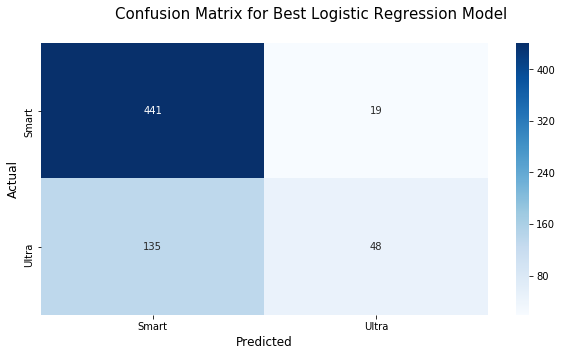

In [8]:
#Create confusion matrix to visualize the classification accuracy.
LogisticR_cm = pd.DataFrame(LogisticR_confusion_array, index = ['Smart', 'Ultra'],
                  columns = ['Smart', 'Ultra'])
plt.figure(figsize = (10,5))
sn.heatmap(LogisticR_cm, annot=True, cmap='Blues', fmt='g')
plt.suptitle("Confusion Matrix for Best Logistic Regression Model", fontsize=15)
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Predicted", fontsize=12)
plt.show()

2.1 Notes: For logistic regession, we decided to iterate through the possible solvers that can be used for the model and test the accracy of each model on the validation dataset. We found that using the 'newton-cg' solver provides the highest accuracy (i.e., approximately .76). Our confusion matrix shows the number of correct and incorrect classifications made by the model. As it turns out, the model was far more accurate at identifying users on the Smart plan than on the Ultra plan. 

### Decision Tree Model<a class="anchor" id='2.2'></a>

In [9]:
#Create list for min_impurity_decrease to iterate through.
min_impurity_vals = [0, .05, .1, .15, .2, .25]

#Create an empty list to store the values for testing the model's accuracy.
DTvalues = []

#Creat a variable in which to store the confusion matrix and the accuracy score for the model with the higest accuracy.
DT_confusion_array = 0
DT_highest_accuracy = 0

#For loop to iterate through the depth and min_impurity_decrease hyperparameter values and train/test the model for each parameter.
for depth in range(1, 15, 2):
    for impurity in min_impurity_vals:
        DT_model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_impurity_decrease=impurity)
        DT_model.fit(train_X, train_y)
        score = DT_model.score(train_X, train_y)
        validation_accuracy = accuracy_score(validate_y, DT_model.predict(validate_X))
        DTvalues.append([depth, impurity, score, validation_accuracy])
        
        #Add the confusion matrix for the model with the highest accuracy to DT_confusion_array.
        if validation_accuracy > DT_highest_accuracy:
            DT_highest_accuracy = validation_accuracy
            DT_confusion_array = confusion_matrix(validate_y, DT_model.predict(validate_X))
    

In [10]:
#Create DataFrame to depict the values from each decision tree model. Sort according to highest validation accuracy.
df_DTree = pd.DataFrame(DTvalues, columns=['Depth', 'Impurity', 'Score', 'Validation Accuracy'])
df_DTree.sort_values(by='Validation Accuracy', inplace=True, ascending=False)
display(df_DTree.head())

,Depth,Impurity,Score,Validation Accuracy
18,7,0.0,0.843880,0.791602
6,3,0.0,0.801349,0.790047
12,5,0.0,0.820021,0.788491
24,9,0.0,0.865664,0.785381
30,11,0.0,0.897303,0.772939


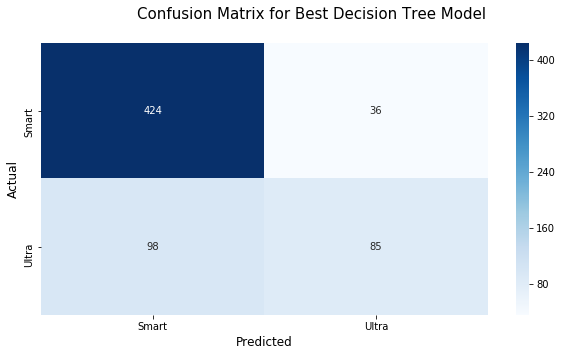

In [11]:
#Create confusion matrix to visualize the decision tree's classification accuracy.
DTree_cm = pd.DataFrame(DT_confusion_array, index = ['Smart', 'Ultra'],
                  columns = ['Smart', 'Ultra'])
plt.figure(figsize = (10,5))
sn.heatmap(DTree_cm, annot=True, cmap='Blues', fmt='g')
plt.suptitle("Confusion Matrix for Best Decision Tree Model", fontsize=15)
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Predicted", fontsize=12)
plt.show()

2.2 Notes: In this subsection, we iterated through a range of tree depths and minimum impurity values to find the decision tree model with the highest accuracy. The minimum impurity values stop a decision tree from splitting if a split does not result in a decrase of impurity greater than the specified level (note, an impurity value of 0 means that all items are correctly classified). While we found that the best decision tree model classified fewer Smart plans correctly than the logistic regressor, it also classified fewer Ultra plans incorrectly. Overall, the accuracy of this model with regard to the validation dataset is approximately .80. The model correctly classified around 92% of Smart plan users and apprimately 46% of Ultra plan users. Given that the accuracy score of the model on the validation dataset is only slightly lower than the model's score with the training dataset, it appears that the model is not overfitted. 

### Random Forest Model<a class="anchor" id='2.3'></a>

In [12]:
#Create an empty list to store the values for testing the model's accuracy.
RFvalues = []

#Creat a variable in which to store the confusion matrix and the accuracy score for the model with the higest accuracy.
RF_confusion_array = 0
RF_highest_accuracy = 0

#Iterate through a range of values for the estimators, depth, and impurity hyperparameters.
for estimators in range(1, 50, 5):
    for depth in range(1, 30, 5):
        for impurity in min_impurity_vals:
            RF_model = RandomForestClassifier(random_state=12345, max_depth=depth, min_impurity_decrease=impurity, n_estimators=estimators)
            RF_model.fit(train_X, train_y)
            score = RF_model.score(train_X, train_y)
            validation_accuracy = accuracy_score(validate_y, RF_model.predict(validate_X))
            RFvalues.append([depth, estimators, impurity, score, validation_accuracy])
            if validation_accuracy > RF_highest_accuracy:
                RF_highest_accuracy = validation_accuracy
                RF_confusion_array = confusion_matrix(validate_y, RF_model.predict(validate_X))

In [13]:
#Create DataFrame to depict the values from each random forest model. Sort according to highest validation accuracy.
df_RForest = pd.DataFrame(RFvalues, columns=['Max_Depth', 'Estimators', 'Impurity', 'Score', 'Validation Accuracy'])
df_RForest.sort_values(by='Validation Accuracy', inplace=True, ascending=False)
display(df_RForest.head())

,Max_Depth,Estimators,Impurity,Score,Validation Accuracy
138,26,16,0.0,0.988589,0.813375
264,11,36,0.0,0.902490,0.811820
78,6,11,0.0,0.835062,0.810264
300,11,41,0.0,0.901452,0.810264
228,11,31,0.0,0.901971,0.810264


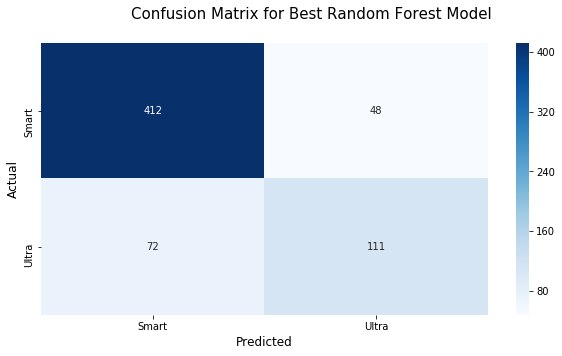

In [14]:
#Create confusion matrix to visualize the random forest's classification accuracy.
RForest_cm = pd.DataFrame(RF_confusion_array, index = ['Smart', 'Ultra'],
                  columns = ['Smart', 'Ultra'])
plt.figure(figsize = (10,5))
sn.heatmap(RForest_cm, annot=True, cmap='Blues', fmt='g')
plt.suptitle("Confusion Matrix for Best Random Forest Model", fontsize=15)
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Predicted", fontsize=12)
plt.show()

2.3 Notes: In this subsection we tested numerous random forest models by iterating through a range of values for the depth, n-estimators, and min_impurity_decrease hyperparameters. Overall, it appears that a random forest model with a depth of 26 and 16 estimates is most accurate at classifying the validation dataset's targets. While the model's score is above .98, which is suggestive of overfitting, the classification accuracy is .81 for the validation dataset. From the confusion matrix, we can see that the model correctly classified approximately 90% of users on the Smart plan and around 61% of users on the ultra plan. 

### Model Training Conclusion<a class="anchor" id='2.4'></a>

In this section we focused on building decision tree, logistic regression, and random forest models, which are three of the most popular machine learning algorithms for classification tasks. In doing so, we altered specific hyperparameters by iterating through a series of values for each. Overall, we found that the best version of each model preducts whether users in the validation dataset are on the Ultra or Smart plan with accuracy of above .75. We found that the most accurate model is a random forest, with a depth of 26, 16 trees in the forest, and a minimum impurity decrease value of 0. In the next section, we will test the best version of each model on the test datasets.

## Model Testing<a class="anchor" id='3'></a>

In this section we will use the hyperparameters identified with the best version of each of the aforementioned models to test the models' accuracy in classifying users' plans in the test dataset. The test dataset is comprised of 20% of the rows from the user_df DataFrame; these rows were randomly selected using the Pandas .sample() method.

### Logistic Regression Test<a class="anchor" id='3.1'></a>

In [15]:
#Create model, fit it to the training dataset, and test its accuracy with the test dataset.
logisticR_Test_Model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=100)
logisticR_Test_Model.fit(train_X, train_y)
logisticR_Test_Model_Accuracy = accuracy_score(test_y, logisticR_Test_Model.predict(test_X))
print("The logistic regression model's accuracy score is: {}".format(logisticR_Test_Model_Accuracy)) #Better than validation and Score

The logistic regression model's accuracy score is: 0.7325038880248833


3.1 Notes: Whereas the accuracy of this model with regard to the validation dataset was about .76, it's accuracy with regard to the test dataset is about .03 points lower. This may be explained by model being somewhat overfitted to the validation dataset. We will go into more detail on this subject in subsection 3.4.

### Decision Tree Test<a class="anchor" id='3.2'></a>

In [16]:
#Create model, fit it to the training dataset, and test its accuracy with the test dataset.
DT_Test_Model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_impurity_decrease=0.0)
DT_Test_Model.fit(train_X, train_y)
DT_Test_Model_Accuracy = accuracy_score(test_y, DT_Test_Model.predict(test_X))
print("The decision tree model's accuracy score is: {}".format(DT_Test_Model_Accuracy))

The decision tree model's accuracy score is: 0.7869362363919129


3.2 Notes: In subsection 2.2, we found that the best decision tree model performed with an accuracy score of approximately .79. The model's accuracy with regard to the test dataset differs by less than .01 point, which suggests that the model is not overfitted to the training and validation datasets.

### Random Forest Test<a class="anchor" id='3.3'></a>

In [17]:
#Create model, fit it to the training dataset, and test its accuracy with the test dataset.
RF_Test_Model = RandomForestClassifier(random_state=12345, max_depth=26, min_impurity_decrease=0.0, n_estimators=16)
RF_Test_Model.fit(train_X, train_y)
RF_Test_Model_Accuracy = accuracy_score(test_y, RF_Test_Model.predict(test_X))
print("The random forest model's accuracy score is: {}".format(RF_Test_Model_Accuracy))

The random forest model's accuracy score is: 0.7900466562986003


3.3 Notes: As we saw with the logistic regression model, the random forest model's accuracy with regard to the test dataset is lower than with the validation dataset; however, the difference is less pronounced with the random forest model. The model's score with the validation dataset was approximately .81, which is only around .02 points greater than the model's score with the test set. Nonetheless, our random forest model appears to be the most accurate model of the bunch, at least with regard to the test dataset.

### Model Testing Conclusion<a class="anchor" id='3.4'></a>

By way of testing our random forest, logistic regression, and decision tree models using our test dataset, we found that the random forest model has the highest overall accuracy, which is to say that it is the model which best classifies users in the test dataset according to whether they are on the Smart or Ultra plan. As Megaline requested a model with an accuracy of at least .75, our random forest model, with an accuracy of about .79 clearly meets their requirements. 

To note, our test accuracies for the random forest and logistic regression models were slightly lower than the models' accuracies with regard to the validation dataset. As we mentioned, this might be due to the models being slightly overfitted to the validation dataset. Whereas we trained the models using the training dataset, we used the validation dataset to tune the hyperparameters in such a way that would provide us with the highest accuracy scores. Since we tuned the hyperparameters in order to obtain the highest accuracy scores for the validation dataset, it may be argued that the dataset essentially functioned as part of the training dataset and, as such, may have resulted in the models being slightly overfitted to the validation dataset. 

In any case, to get an even better feel for the accuracy of our model, we would recommend testing the model on a dataset that is not a subset of the user_df dataframe, from which we took out training, validation, and testing datasets, but rather another dataset altogether. If another dataset was populated with data from a different population, it may have an affect on the random forest model's accuracy.

## Sanity Checking<a class="anchor" id='4'></a>

Sanity checking essentially involves determining whether the results of one's test could be reasonably expected. In carrying out a sanity check, we will examine our data in an attempt to understand whether our random forest model's accuracy score is misleading.

### Check for Duplicates<a class="anchor" id='4.1'></a>

In [18]:
print("There are {} duplicate rows in user_df.".format(user_df.duplicated().sum()))

There are 0 duplicate rows in user_df.


### Check for Negative Values<a class="anchor" id='4.2'></a>

In [19]:
print("There are {} negative values in user_df.".format(sum(n < 0 for n in user_df.values.flatten())))

There are 0 negative values in user_df.


### Generate Classification Report<a class="anchor" id='4.3'></a>

        Classification Report for Random Forest Test Model

              precision    recall  f1-score   support

       Smart       0.80      0.91      0.85       434
       Ultra       0.75      0.53      0.62       209

    accuracy                           0.79       643
   macro avg       0.78      0.72      0.74       643
weighted avg       0.79      0.79      0.78       643



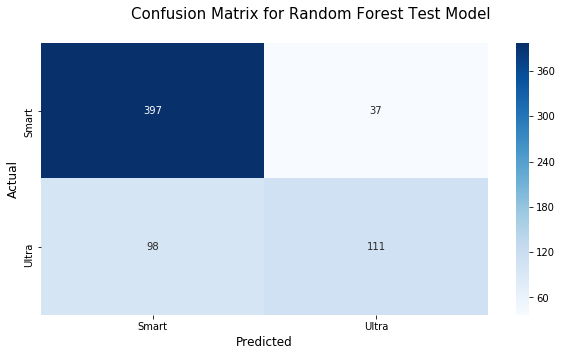

In [20]:
#Generate classification report for random forest test.
print("        Classification Report for Random Forest Test Model\n")
print(classification_report(test_y, RF_Test_Model.predict(test_X), target_names=['Smart', 'Ultra']))

rf_test_confusion_array = confusion_matrix(test_y, RF_Test_Model.predict(test_X))

#Create confusion matrix to visualize the random forest's classification accuracy.
RForest_test_cm = pd.DataFrame(rf_test_confusion_array, index = ['Smart', 'Ultra'],
                  columns = ['Smart', 'Ultra'])
plt.figure(figsize = (10,5))
sn.heatmap(RForest_test_cm, annot=True, cmap='Blues', fmt='g')
plt.suptitle("Confusion Matrix for Random Forest Test Model", fontsize=15)
plt.ylabel("Actual", fontsize=12)
plt.xlabel("Predicted", fontsize=12)
plt.show()

4.3 Notes: Whereas a model's accuracy score tells us the ratio of the number of correct answers to the total number of questions, it's useful to consider other metrics when measuring the effectiveness of a model. From the above classification report, we can see the model's precision, recall, and f1-score for each label. These scores represent the following:

* Precision: The percentage of our model's predictions that were correct. This is calculated as the number of true positives divided by the number of true positives and false positives.


* Recall: The percentage of positives that the model caught. This is calculated as the number of true positives divided by the number of true positives and false negatives.


* f1-score: This represents the weighted average of the precision and recall. The best value is 1 and the worst is 0.

From the values listed in the classification report, our suspicion that the model is better at classifying users on the Smart plan over the Ultra plan is supported. Our model's precision, recall, and f1-scores are notably higher for the Smart label than Ultra. As can be seen, out model only correctly classified approximately half of the Ultra users. Our confusion matrix for this model on the test dataset confirms this. So, wheras our model has a relatively high accuracy score, it is lacking in its ability to classify users on the Ultra plan. 

At this stage, we hypothesize that the model's inability to classify users on the Ultra plan as well as those on the Smart plan is due to there being a higher variance in feature values for Ultra plan users than Smart plan users. With a higher variance, it is likely that much of the feature values for Ultra plan users overlaps with the values of Smart plan users, which would make it difficult for the algorithm to effectively differentiate between users of each plan. Because of this, and the possible overrepresentation of Ultra users in the dataset, our model's accuracy score may be higher because it classifies more users as being on the Smart plan and such classifications have a greater chance of being true.

### Examine Distributions<a class="anchor" id='4.4'></a>

In [21]:
#Create DataFrames for users of each specific Megaline plan.
ultra = user_df.loc[user_df['is_ultra'] == 1]
not_ultra = user_df.loc[user_df['is_ultra'] != 1]
ultra.reset_index(inplace=True, drop=True)
not_ultra.reset_index(inplace=True, drop=True)

In [22]:
#Check the variance in values for users of each plan.
variance_DF = pd.DataFrame({'Ultra' : [round(i) for i in ultra.var()[:-1]],
                            'Smart' : [round(i) for i in not_ultra.var()[:-1]]},
                          index=[i for i in ultra.columns[:-1]])

#Get the proportion of Ultra to Smart variance.
variance_DF['proportion'] = (variance_DF.Ultra / variance_DF.Smart).round(3)

print(variance_DF)

              Ultra     Smart  proportion
calls          1929       673       2.866
minutes       94883     34045       2.787
messages       2285       797       2.867
mb_used   101751173  34462757       2.952


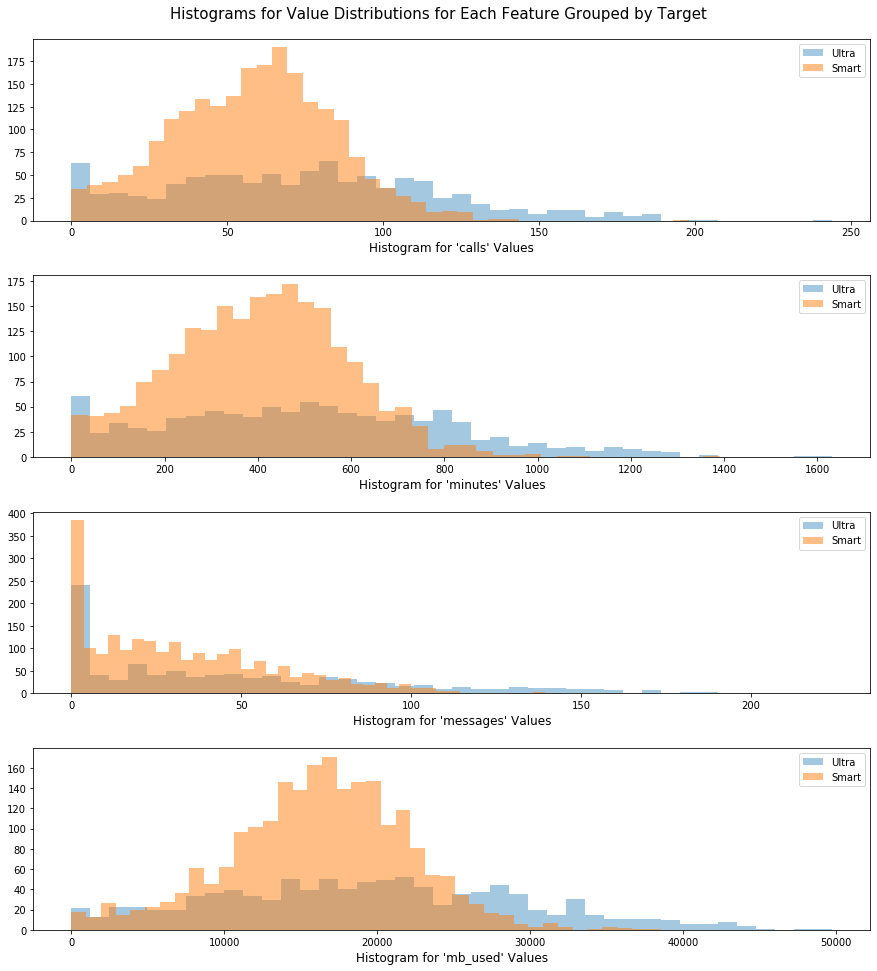

In [23]:
#Create list of columns to iterate through.
columns = user_df.columns[:-1].to_list()

#Create figure on which to plot subplots.
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))
plt.suptitle("Histograms for Value Distributions for Each Feature Grouped by Target", fontsize=15)

#Create grouped histogram for each column.
for column in columns:
    axs[columns.index(column)].hist(ultra[column], density=False, bins=40, alpha=0.4, label='Ultra')
    axs[columns.index(column)].hist(not_ultra[column], density=False, bins=40, alpha=0.5, label='Smart')
    axs[columns.index(column)].legend()
    axs[columns.index(column)].set_xlabel("Histogram for '" + column + "' Values", fontsize=12)

fig.subplots_adjust(hspace=.30)
plt.subplots_adjust(top=0.95)
plt.show()

In [24]:
#Calculate the proportion of users on the Smart plan versus the Ultra plan.
print('The proportion of users on the Smart plan versus the Ultra plan is: {}' \
      .format(len(user_df.loc[user_df['is_ultra'] == 0]) / len(user_df.loc[user_df['is_ultra'] == 1])))

The proportion of users on the Smart plan versus the Ultra plan is: 2.2629441624365483


4.4 Notes: In this subsection we calculated the variance in feature values for users of each plan. As we suspected, there is a far greater variance (nearly 3 times) for Ultra users' featuer values than Smart users'. Because of this, it is likely that much of the data for Smart users overlaps with the data for Ultra users. We built histograms to visualize the distribution of data and check whether our suspicion is correct.

From the above grouped histograms, we can see that the range of values for those on the Ultra plan is wider than the range for those on the Smart plan. Additionally, the majority of values for users of the Ultra plan overlap it those of users on the Smart plan. We believe this is the reason behind our models' being far better at classifying users on the Smart plan than those on the Ultra plan. The algorithm would likely make predictions with a higher accuracy if there was a more pronounced difference in feature values between users of each plan. 

We also confirmed, that there are far more users on the Smart plan than on the Ultra plan (i.e., approximately 2.25 times more). Becuase of this, the algorithms may have been more finely tuned to select Smart users over Ultra users. We believe that, given the large amount of overlap in values for users of both plans, if we train a random forest model with the same hyperparameters we identified as providing the highest accuracy on a dataset with an equal distribution of Smart and Ultra users, the accuracy score would be lower for this model than the random forest model we tested above.

### Test Equally Distributed Dataset<a class="anchor" id='4.5'></a>

In [25]:
#Take random sample of 500 rows from both ultra and not_ultra dataframes.
ultra_sample = ultra.sample(n=500, random_state=12345) 
not_ultra_sample = not_ultra.sample(n=500, random_state=12345)

#Concatenate DataFrames for testing.
sanity_frame = pd.concat([ultra_sample, not_ultra_sample])

#Separate into features and target DataFrames.
sanity_frame_X = sanity_frame.drop(columns='is_ultra', axis=0)
sanity_frame_y = sanity_frame['is_ultra']

#Separate into training and testing DataFrames.
sanity_train_X, sanity_test_X, sanity_train_y, sanity_test_y = train_test_split(sanity_frame_X, sanity_frame_y, test_size=0.33, random_state=42)

In [26]:
#Train and test a random forest model using the sanity sample and same hyperparameters as test model.
RF_Sanity_Model = RandomForestClassifier(random_state=12345, max_depth=26, min_impurity_decrease=0.0, n_estimators=16)
RF_Sanity_Model.fit(sanity_train_X, sanity_train_y)
RF_Sanity_Model_Accuracy = accuracy_score(sanity_test_y, RF_Sanity_Model.predict(sanity_test_X))

print("The random forest model's accuracy score using equally distributed data is: {}".format(RF_Sanity_Model_Accuracy))

The random forest model's accuracy score using equally distributed data is: 0.706060606060606


4.5 Notes: In this subsection we created a DataFrame by concatening the ultra_sample and not_ultra_sample DataFrames. These DataFrames were each populated with 500 random samples, thus ensuring that there is an equal representation of Ultra and Smart users in the sanity_frame DataFrame. We then created a random forest model using the same hyperparameters as our test model in section 3.3 and fit the model to our sanity training data, which is comprised of approximately 66% of the data from the sanity_frame dataset. 

The accuracy score of module in relation to the sanity test dataset is approximately .71. This is quite a bit lower than the accuracy score of our test random forest model and supports our suspision - that is, given that there is a large overlap in feature values for Smart and Ultra users, and a larger variance in values for Ultra users, a random forest model would be less accurate at classifying which plan a user is on when there is an equal distribution of users, as opposed to our original dataset where there are approximately 2.25 more users on the Smart plan versus the Ultra plan. 

To note, we originally considered just performing a test using the equally distributed dataset and the random forest test model we created in section 3.3. However, we decided against this because the model was found to be quite overfitted - that is, it's score was about .99 in relation to the training data. Since there are less than 1000 Ultra users represented in the original dataset, it is likely that, with a population of 500 Ultra users in our sanity dataset, we would generate a higher accuracy score than the one for the random forest test model in section 3.3. This score would be misleading, as it would result from the overfitting of the data to the model; as such, we opted to retrain the model using around 66% of our sanity sample.

### Sanity Checking Conclusion<a class="anchor" id='4.6'></a>

Based on our examination of the user_df dataset, we believe that the accuracy score obtained for the random forest model on the test dataset is somewhat misleading. While it does indicate that the model is quite accurate in classifying users according to their Megaline plan, it is substantially less accurate at classifying Ultra users than Smart users. Our suspicion was that, because Smart users are over-represented in the dataset and because feature values for Ultra and Smart users largely overlap, our model may be tilted towards classifying individuals as being on the Smart plan over the Ultra plan. To test this hypothesis, we created a randomly generated DataFrame that is a subset of data from the user_df DataFrame and which contains data from an equal number of Smart and Ultra users. We then trained the random forest model on 2/3 of the data from this new dataset using the same hyperparameters as our test model in section 3. We then tested this model on 1/3 of the data from the new dataset and found that, as suspected, the accuracy score was notably lower than the score from our test model. This finding supports our view that the accuracy score from our model on the test set is misleading, as it is trained with one population being over-represented and with feature values largely overlapping for users of both plans.

## Conclusion<a class="anchor" id='5'></a>

For this project our task was to train a machine learning model to classify Megaline users based on whether they are on a Smart plan or Ultra plan with an accuracy of greater than .75. In carrying out this task, we separated data into training, validation, and testing datasets, and trained various logistic regression, decision tree, and random forest models while iterating through several key hyperparameters. Based on the accuracy scores for the models on the validation dataset, we found that the random forest model with a depth of 24 and 16 estimators was was the most accurate model. This held true when running the test dataset throught he model; however, the accuracy score for the model on the test dataset was slightly lower. 

We then performed a sanity check in order to determine whether the model's accuracy score on the test dataset was misleading. We hypothesized, in light of the high variance of data for Ultra users, the overlap of values for features for users on each plan, and the over-representation of data for Smart users in the original dataset, that the model would be less accurate at carrying out the classification task if the users of both plans were equally represented in the dataset. To test this, we randomly selected 500 rows of data for users of each plan from the user_df DataFrame, trained a random tree model using this dataset and with the hyperparameters tuned to the same values as with out test model, and obtained the accuracy score. It turns out our hypothesis was correct, as the model was less accurate at classifying users according to their plan when users of each plan were equally represented in the dataset.

Overall, while our accuracy score for the random forest model on the test data was quite high (and above the required accuracy, as stated by Megaline), we believe that the over-representation of Smart users in the dataset and overlap of feature values for user of each plan caused the model to erroneously classify more users as having the Smart plan than Ultra plan. As such, we would recommend the following:

1) **Collect more data for the model**: As was stated in the details of this project, Megaline's Ultra and Smart plans are new. Depending on how new the plans are, it is likely that many users on the Ultra plans have not become accumstomed to the allowances they have. We would recommend that Megaline continue to collect more data on individuals using each plan and retrain the random forest model using this new data.


2) **Balance the datasets**: As was mentioned, there are approximately 3 times more Smart users represented in the dataset than Ultra users. We believe that by ensuring users of each plan are equally represented in the dataset, our model's accuracy score will more accurately reflect its ability to properly classify individuals on each plan.

3) **Add additional features to the dataset**: We believe that more information could be added to the dataset to make the model more efficient. In our previous Megaline project, we calculated the extent to which individuals on each plan went above their allwances. We consider this information to be highly valuable, as we found that users on the plan with a lower allowance went over their limit more often and to a greater extent than users on the other plan. We believe that our model's accuracy score would be increased with this key piece of data.